### This is an unsuccessful attempt to do some nonlinear dim reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from copy import copy

In [2]:
MOVIE_LENS_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw', 'movie_lense'))
MOVIE_LENS_PATH

'/home/levin/escaping_echo_chambers/data/raw/movie_lense'

In [3]:
genome_scores = pd.read_csv(os.path.join(MOVIE_LENS_PATH, 'genome-scores.csv'))

In [4]:
wide_genome_scores = genome_scores.pivot(index='movieId', columns='tagId')
wide_genome_scores.columns = ['TagId_' + str(i) for i in wide_genome_scores.columns.droplevel().rename(None)]

In [5]:
wide_genome_scores.head()

,TagId_1,TagId_2,TagId_3,TagId_4,TagId_5,TagId_6,TagId_7,TagId_8,TagId_9,TagId_10,...,TagId_1119,TagId_1120,TagId_1121,TagId_1122,TagId_1123,TagId_1124,TagId_1125,TagId_1126,TagId_1127,TagId_1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02900,0.02375,0.05425,0.06875,0.16000,0.19525,0.07600,0.25200,0.22750,0.02400,...,0.03775,0.02250,0.04075,0.03175,0.12950,0.04550,0.02000,0.03850,0.09125,0.02225
2,0.03625,0.03625,0.08275,0.08175,0.10200,0.06900,0.05775,0.10100,0.08225,0.05250,...,0.04775,0.02050,0.01650,0.02450,0.13050,0.02700,0.01825,0.01225,0.09925,0.01850
3,0.04150,0.04950,0.03000,0.09525,0.04525,0.05925,0.04000,0.14150,0.04075,0.03200,...,0.05800,0.02375,0.03550,0.02125,0.12775,0.03250,0.01625,0.02125,0.09525,0.01750
4,0.03350,0.03675,0.04275,0.02625,0.05250,0.03025,0.02425,0.07475,0.03750,0.02400,...,0.04900,0.03275,0.02125,0.03675,0.15925,0.05225,0.01500,0.01600,0.09175,0.01500
5,0.04050,0.05175,0.03600,0.04625,0.05500,0.08000,0.02150,0.07375,0.02825,0.02375,...,0.05375,0.02625,0.02050,0.02125,0.17725,0.02050,0.01500,0.01550,0.08875,0.01575


In [6]:
from sklearn.decomposition import PCA
reduced_genome = PCA(n_components=10).fit_transform(wide_genome_scores)


In [7]:
def visualize_embedding(method, X, hyperparams, clusters, **kwargs):
    sns.set_style("whitegrid", {'axes.grid' : False})
    default_args = copy(kwargs)
    embeddings_results = {} 
    for range_key in hyperparams.keys():
        #Set to default kwargs:
        kwargs = copy(default_args)
        X_embs = []
        for hyperparam in hyperparams[range_key]:
            print(range_key, '=', hyperparam)
            kwargs[range_key] = hyperparam
            model = method(**kwargs)
            # model.fit(X)
            X_embs.append(model.fit_transform(X))
        embeddings_results[range_key] = X_embs
        
    for key in embeddings_results.keys():
        X_embs = embeddings_results[key]
        fig, axs = plt.subplots(2, len(X_embs)//2, figsize=(30,15))#
        fig.suptitle(method.__name__)
        plt.subplots_adjust(top=0.93)
        for num, ax_ in enumerate(axs.flatten()):
            ax_.scatter(X_embs[num][:, 0], X_embs[num][:, 1],  c = clusters)
            ax_.title.set_text('{} {}'.format(key, hyperparams[key][num]))


    return 

In [ ]:
from sklearn.manifold import TSNE

method = TSNE
hyperparams = {'perplexity': [5, 20, 30, 50],
                      'early_exaggeration': [10.0, 12.0, 15.0, 20.0]}

visualize_embedding(method, wide_genome_scores, hyperparams, None, **{'perplexity': 30, 'early_exaggeration': 20.0,
 'n_components': 2,
 'n_iter': 300,
 'n_jobs': -1})

In [ ]:
from sklearn.manifold import Isomap

method = Isomap
hyperparams = {'n_neighbors': [5, 10, 20, 30]}#, 30, 40, 50, 100, 200]}

visualize_embedding(method, reduced_genome, hyperparams, None, **{'n_neighbors': 50,
 'n_components': 2,
 'max_iter': 1000,
 'n_jobs': -1})

n_neighbors = 5


n_neighbors = 5
n_neighbors = 10
n_neighbors = 20


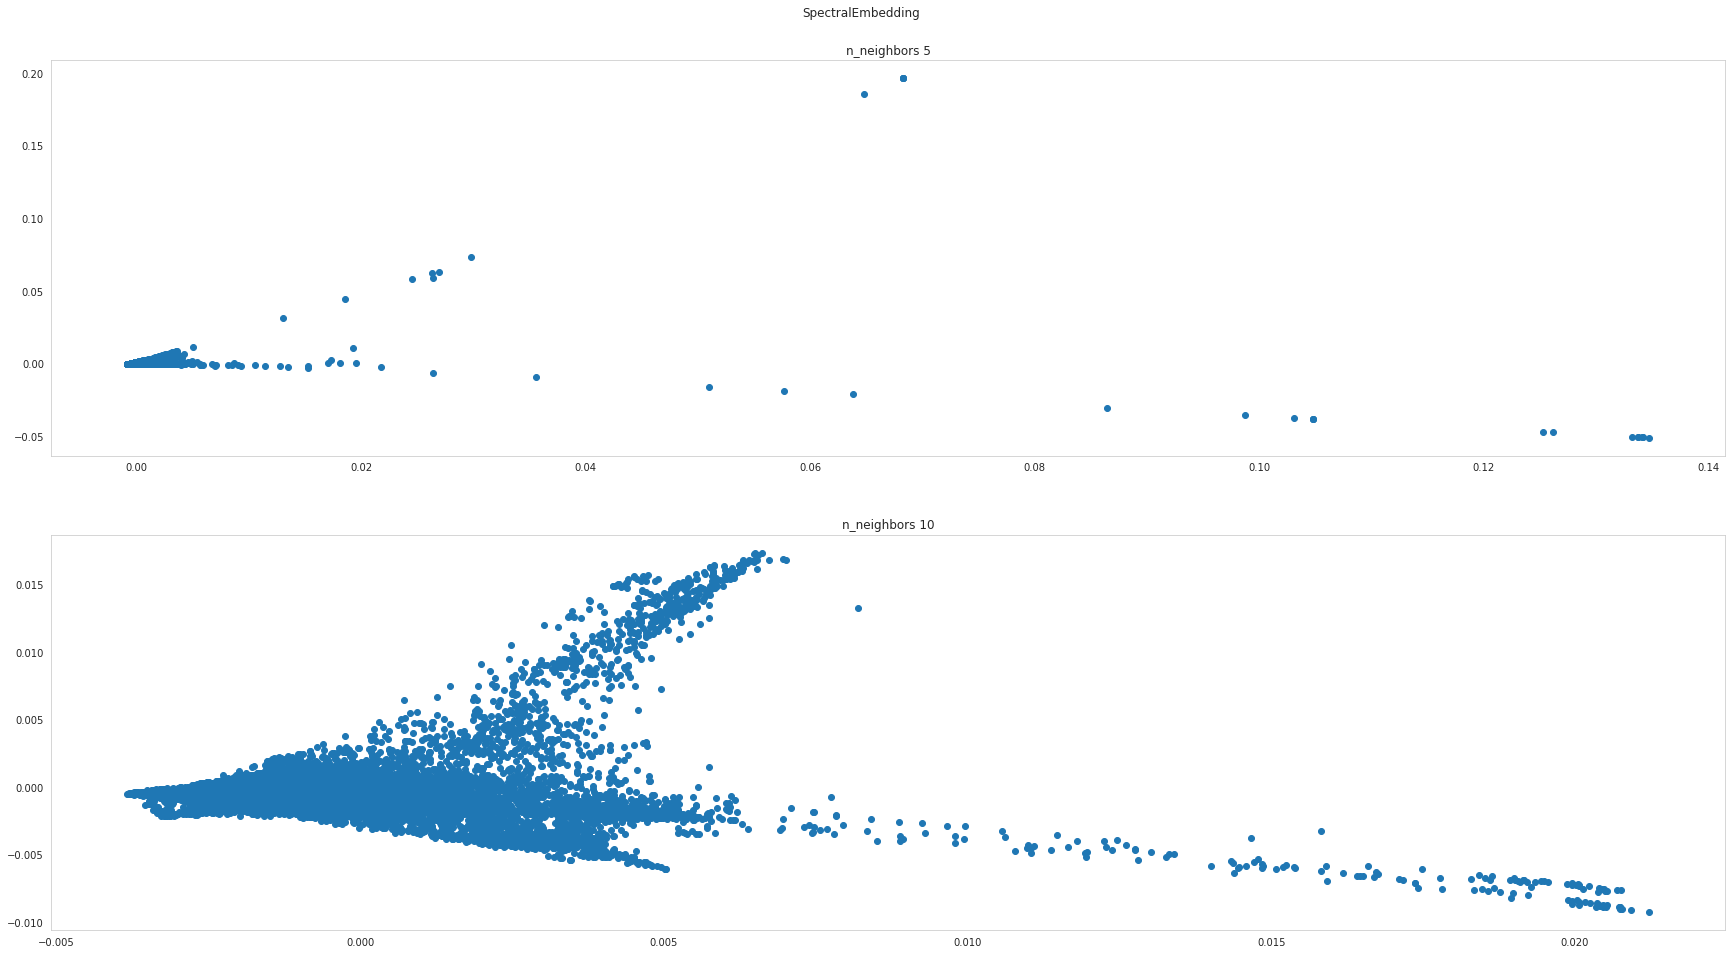

In [8]:
from sklearn.manifold import SpectralEmbedding


method = SpectralEmbedding
hyperparams = {'n_neighbors': [5, 10, 20]}#, 30, 40, 50, 100, 200]}

visualize_embedding(method, wide_genome_scores, hyperparams, None, **{'n_neighbors': 50,
 'n_components': 2,
 'n_jobs': -1})

n_components = 2
n_components = 2


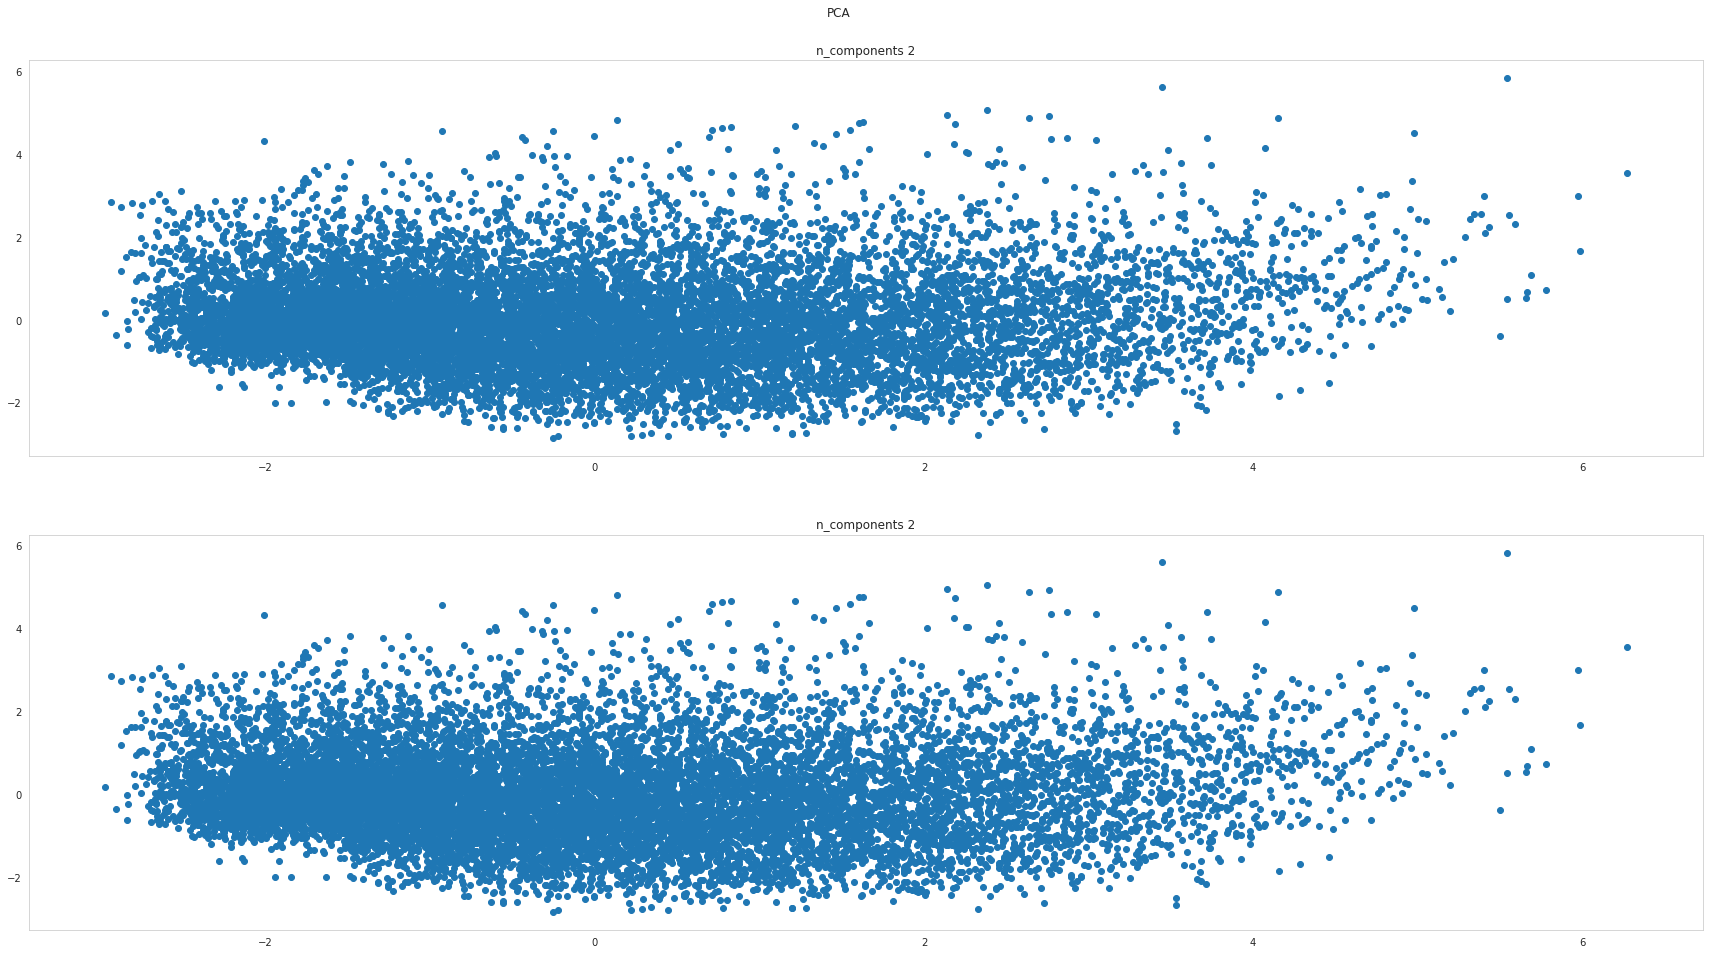

In [11]:
%matplotlib inline
from sklearn.decomposition import PCA

method = PCA
hyperparams = {'n_components': [2, 2]}

visualize_embedding(method, wide_genome_scores, hyperparams, None, **{'n_components': 2})

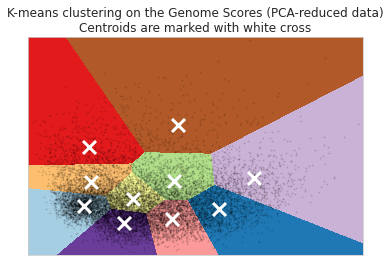

In [25]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

# X_digits, y_digits = load_digits(return_X_y=True)
X_digits = wide_genome_scores
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = 10#len(np.unique(y_digits))
# labels = y_digits

sample_size = 300

# print("n_digits: %d, \t n_samples %d, \t n_features %d"
#       % (n_digits, n_samples, n_features))


# print(82 * '_')
# print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
# #     print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
# #           % (name, (time() - t0), estimator.inertia_,
# # #              metrics.homogeneity_score(labels, estimator.labels_),
# # #              metrics.completeness_score(labels, estimator.labels_),
# # #              metrics.v_measure_score(labels, estimator.labels_),
# # #              metrics.adjusted_rand_score(labels, estimator.labels_),
# # #              metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
# #              metrics.silhouette_score(data, estimator.labels_,
# #                                       metric='euclidean',
# #                                       sample_size=sample_size)))

# bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
#               name="k-means++", data=data)

# bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
#               name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
#               name="PCA-based",
#               data=data)
# print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2, alpha = 0.1)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Genome Scores (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
X_digits.shape

(1797, 64)

([], [])

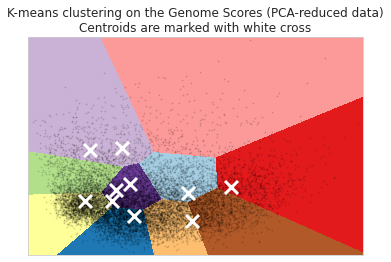

In [26]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

# X_digits, y_digits = load_digits(return_X_y=True)
X_digits = wide_genome_scores
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = 10#len(np.unique(y_digits))
# labels = y_digits

sample_size = 300

# print("n_digits: %d, \t n_samples %d, \t n_features %d"
#       % (n_digits, n_samples, n_features))


# print(82 * '_')
# print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
# #     print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
# #           % (name, (time() - t0), estimator.inertia_,
# # #              metrics.homogeneity_score(labels, estimator.labels_),
# # #              metrics.completeness_score(labels, estimator.labels_),
# # #              metrics.v_measure_score(labels, estimator.labels_),
# # #              metrics.adjusted_rand_score(labels, estimator.labels_),
# # #              metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
# #              metrics.silhouette_score(data, estimator.labels_,
# #                                       metric='euclidean',
# #                                       sample_size=sample_size)))

# bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
#               name="k-means++", data=data)

# bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
#               name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
#               name="PCA-based",
#               data=data)
# print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data
reduced_PCA = PCA(n_components=2).fit(data)
reduced_data = reduced_PCA.transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

kmeans1 = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans1.fit(data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2, alpha = 0.1)
# Plot the centroids as a white X
centroids = reduced_PCA.transform(kmeans1.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Genome Scores (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [28]:
reduced_PCA.explained_variance_

array([117.26232822,  65.17414973])